# Seyed Mohammad Amin Atyabi - 830402014 - HW 2 (Part 6)

برای حل این سوال از کتابخانه $igraph$ استفاده شده است. ابتدا به کمک کتابخانه $scipy$ فایل داده متلب که حاوی ماتریس مجاورت شبکه های مربوطه بود خوانده شده؛ سپس از این ماتریس شبکه را میسازیم.

جهت جلوگیری از نوشتن کد تکراری همه فایل دادگان در یک پوشه قرار گرفت و برنامه ما تحلیل های لازم را بر روی تمام فایل های داخل آن پوشه اجرا میکند.

برای حل این سوال چالش های زیادی بود که در ادامه به توضیح آن ها خواهیم پرداخت. اما در ابتدا به توضیح نحوه کارکرد کد میپردازیم.

پس از خواندن ماتریس مجاورت از فایل، آن را به یک شبکه تبدیل میکنیم. سپس تمام مولفه های این گراف را بدست می آوریم. از میان این مولفه ها بزرگترین را انتخاب کرده و از این مولفه شبکه ای میسازیم که زیر گرافی از گراف اصلی است. پارامتر قطر شبکه به کمک توابع موجود در کتابخانه به آسانی قابل دسترس است. سپس در این زیر گراف با کمک توابع موجود تمام کوتاهترین مسیر های میان دو گره در گراف را بدست می آوریم و از آن ها میانگین میگیریم تا میانگین فاصله جئودسیک بدست آید.

در نهایت اطلاعات قطر بزرگترین مولفه به همراه تعداد گره های شبکه بعلاوه میانگین فاصله جئودسیک به همراه تعداد گره های بزرگترین مولفه شبکه ذخیره میشود تا برای بخش های بعدی نمودار آن رسم شود.

از جمله چالش های پیش رو برای حل این سوال میتوان به زمان بالای اجرا و میزان حافظه بالا برای محاسبات اشاره کرد. این در حالی بود که در صورتی که دچار خطایی شده باشیم مجبوریم مجدد زمان زیادی صرف اجرا کنیم.

برای مثال اجرا زیر حدود 135 دقیقه زمان و 100 گیگابایت مموری مصرف شده است که همانطور که ملاحظه میشود تمام شبکه ها مورد بررسی قرار گرفته اند.

در حین اجرا با مشکل کمبود حافظه مواجه میشدم که برای بررسی بر روی گوگل کولب و گیت هاب کد اسپیس نیز اجرا شد و در هر دو این فضا ها نیز با مشکل حافظه مواجه شدم.

راهکاری که برای دستیابی به نتیجه مطلوب انجام دادم مرتب کردن فایل های دیتاست بر اساس اندازه آن ها بود. به این صورت که احتمالای فایلی که حجم کمتری دارد تعداد گره ها و یال های کمتری نیز دارد و همانظور که مشاهده میکنید نتیجه بسیار خوب بوده است.

In [1]:
import os

data_dir = 'Data'
list_of_files = filter(lambda x: os.path.isfile(os.path.join(data_dir, x)), os.listdir(data_dir))
list_of_files = sorted(list_of_files, key=lambda x: os.stat(os.path.join(data_dir, x)).st_size)

In [2]:
import os
import numpy
import igraph
from scipy import io as sio

n_list = []
ng_list = []

for dataset in list_of_files:
    if '.mat' not in dataset:
      continue
    name = dataset.replace('.mat', '')
    print(f'Dataset: {name}')

    file = sio.loadmat(f'Data/{dataset}')
    connections = file.get('A').A

    network = igraph.Graph.Adjacency(connections)
    components = network.components()
    components_size = components.sizes()
    giant_component_index = components_size.index(max(components_size))
    giant_component = components.subgraph(giant_component_index)

    giant_component_diameter = giant_component.diameter()
    mean_shortest_path = numpy.mean(giant_component.distances())

    n_list.append((len(network.vs), giant_component_diameter))
    ng_list.append((len(giant_component.vs), mean_shortest_path))

    print(f'#Nodes = {len(network.vs)}')
    print(f'#Edges = {len(network.es)}')
    print(f'Diameter = {giant_component_diameter}')
    print(f'Average geodesic path = {mean_shortest_path}')
    print('------------------------------------------------------------------------------')

Dataset: Caltech36
#Nodes = 769
#Edges = 33312
Diameter = 6
Average geodesic path = 6
------------------------------------------------------------------------------
Dataset: Reed98
#Nodes = 962
#Edges = 37624
Diameter = 6
Average geodesic path = 6
------------------------------------------------------------------------------
Dataset: Simmons81
#Nodes = 1518
#Edges = 65976
Diameter = 7
Average geodesic path = 7
------------------------------------------------------------------------------
Dataset: Haverford76
#Nodes = 1446
#Edges = 119178
Diameter = 6
Average geodesic path = 6
------------------------------------------------------------------------------
Dataset: Swarthmore42
#Nodes = 1659
#Edges = 122100
Diameter = 6
Average geodesic path = 6
------------------------------------------------------------------------------
Dataset: USFCA72
#Nodes = 2682
#Edges = 130504
Diameter = 7
Average geodesic path = 7
------------------------------------------------------------------------------
Dat

MemoryError: Error at src/core/vector.c:146: Cannot initialize vector. -- Out of memory

In [3]:
n_list = sorted(n_list, key=lambda x: x[0])
ng_list = sorted(ng_list, key=lambda x: x[0])

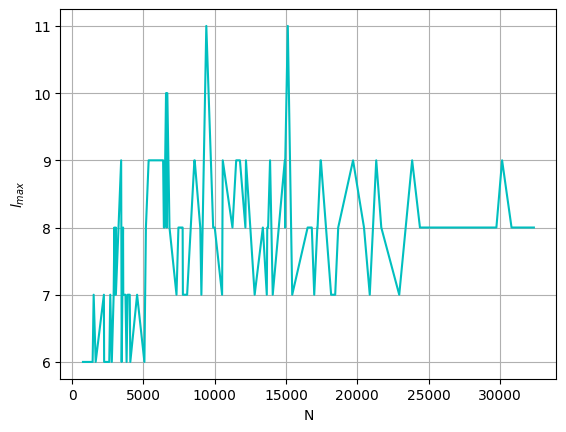

In [4]:
from matplotlib import pyplot as plt

plt.plot([x[0] for x in n_list], [x[1] for x in n_list], color='c')
plt.xlabel('N')
plt.ylabel('$ l_{max} $')
plt.grid()
plt.show()

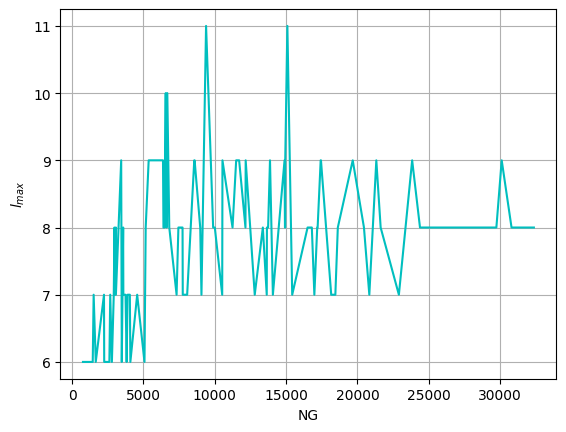

In [5]:
plt.plot([x[0] for x in ng_list], [x[1] for x in ng_list], color='c')
plt.xlabel('NG')
plt.ylabel('L')
plt.grid()
plt.show()